<a href="https://colab.research.google.com/github/ajayshinde38/AI-based-Innovation-and-Product-Development/blob/main/Crop_Diasease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 847.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.8 MB/s eta 0:00:00


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
train_data=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)

In [3]:
import kagglehub

path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.


In [4]:
train_generator=train_data.flow_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='training'

)

Found 56251 images belonging to 38 classes.


In [5]:
test_data=ImageDataGenerator(
    rescale=1/255
)

In [6]:
validation_generator = train_data.flow_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='validation'
)

Found 14044 images belonging to 38 classes.


In [7]:
for label,index in train_generator.class_indices.items():
    print(index," : ",label)

0  :  Apple___Apple_scab
1  :  Apple___Black_rot
2  :  Apple___Cedar_apple_rust
3  :  Apple___healthy
4  :  Blueberry___healthy
5  :  Cherry_(including_sour)___Powdery_mildew
6  :  Cherry_(including_sour)___healthy
7  :  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8  :  Corn_(maize)___Common_rust_
9  :  Corn_(maize)___Northern_Leaf_Blight
10  :  Corn_(maize)___healthy
11  :  Grape___Black_rot
12  :  Grape___Esca_(Black_Measles)
13  :  Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14  :  Grape___healthy
15  :  Orange___Haunglongbing_(Citrus_greening)
16  :  Peach___Bacterial_spot
17  :  Peach___healthy
18  :  Pepper,_bell___Bacterial_spot
19  :  Pepper,_bell___healthy
20  :  Potato___Early_blight
21  :  Potato___Late_blight
22  :  Potato___healthy
23  :  Raspberry___healthy
24  :  Soybean___healthy
25  :  Squash___Powdery_mildew
26  :  Strawberry___Leaf_scorch
27  :  Strawberry___healthy
28  :  Tomato___Bacterial_spot
29  :  Tomato___Early_blight
30  :  Tomato___Late_blight
31  :  T

In [8]:
import matplotlib.pyplot as plt
import numpy as np

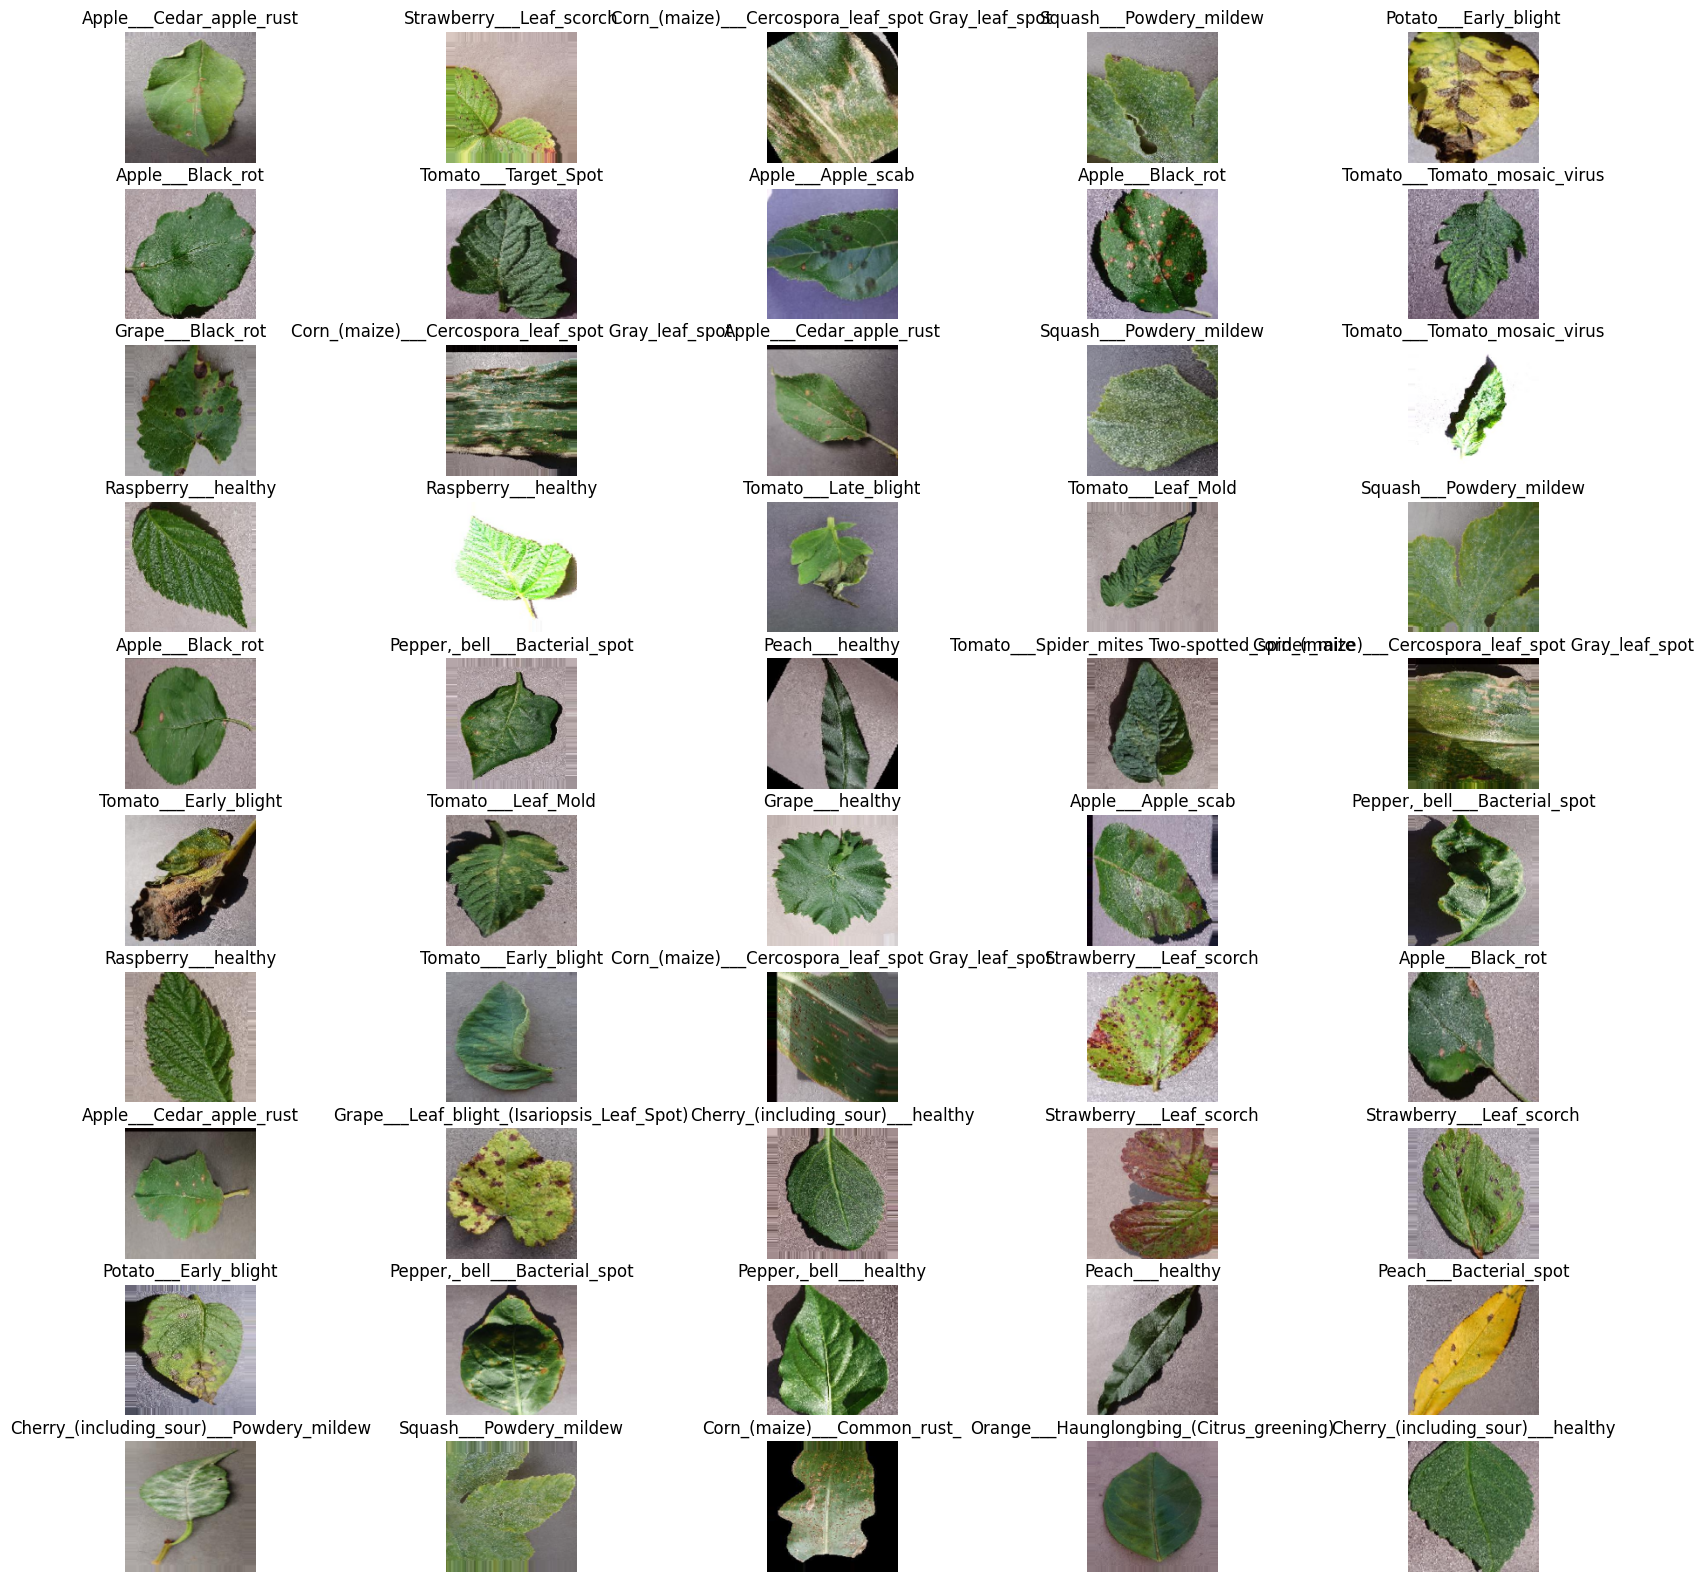

In [9]:
images, labels = next(train_generator)

class_labels = {v: k for k, v in train_generator.class_indices.items()}


label_indices = np.argmax(labels, axis=1)


random_indices = np.random.choice(len(images), 50, replace=False)


plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
    plt.subplot(10, 5, i + 1)
    plt.imshow(images[idx])
    plt.title(class_labels[label_indices[idx]])
    plt.axis('off')

plt.show()

In [10]:
model=Sequential([
  Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),

  Conv2D(32,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(64,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(128,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(256,(3,3),activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(512,(3,3),activation='relu'),
  MaxPooling2D((2,2)),



  Flatten(),
  Dense(512, activation='relu'),
  Dense(38, activation='softmax')

])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,646,406 (10.10 MB)

 Trainable params: 2,646,406 (10.10 MB)

 Non-trainable params: 0 (0.00 B)

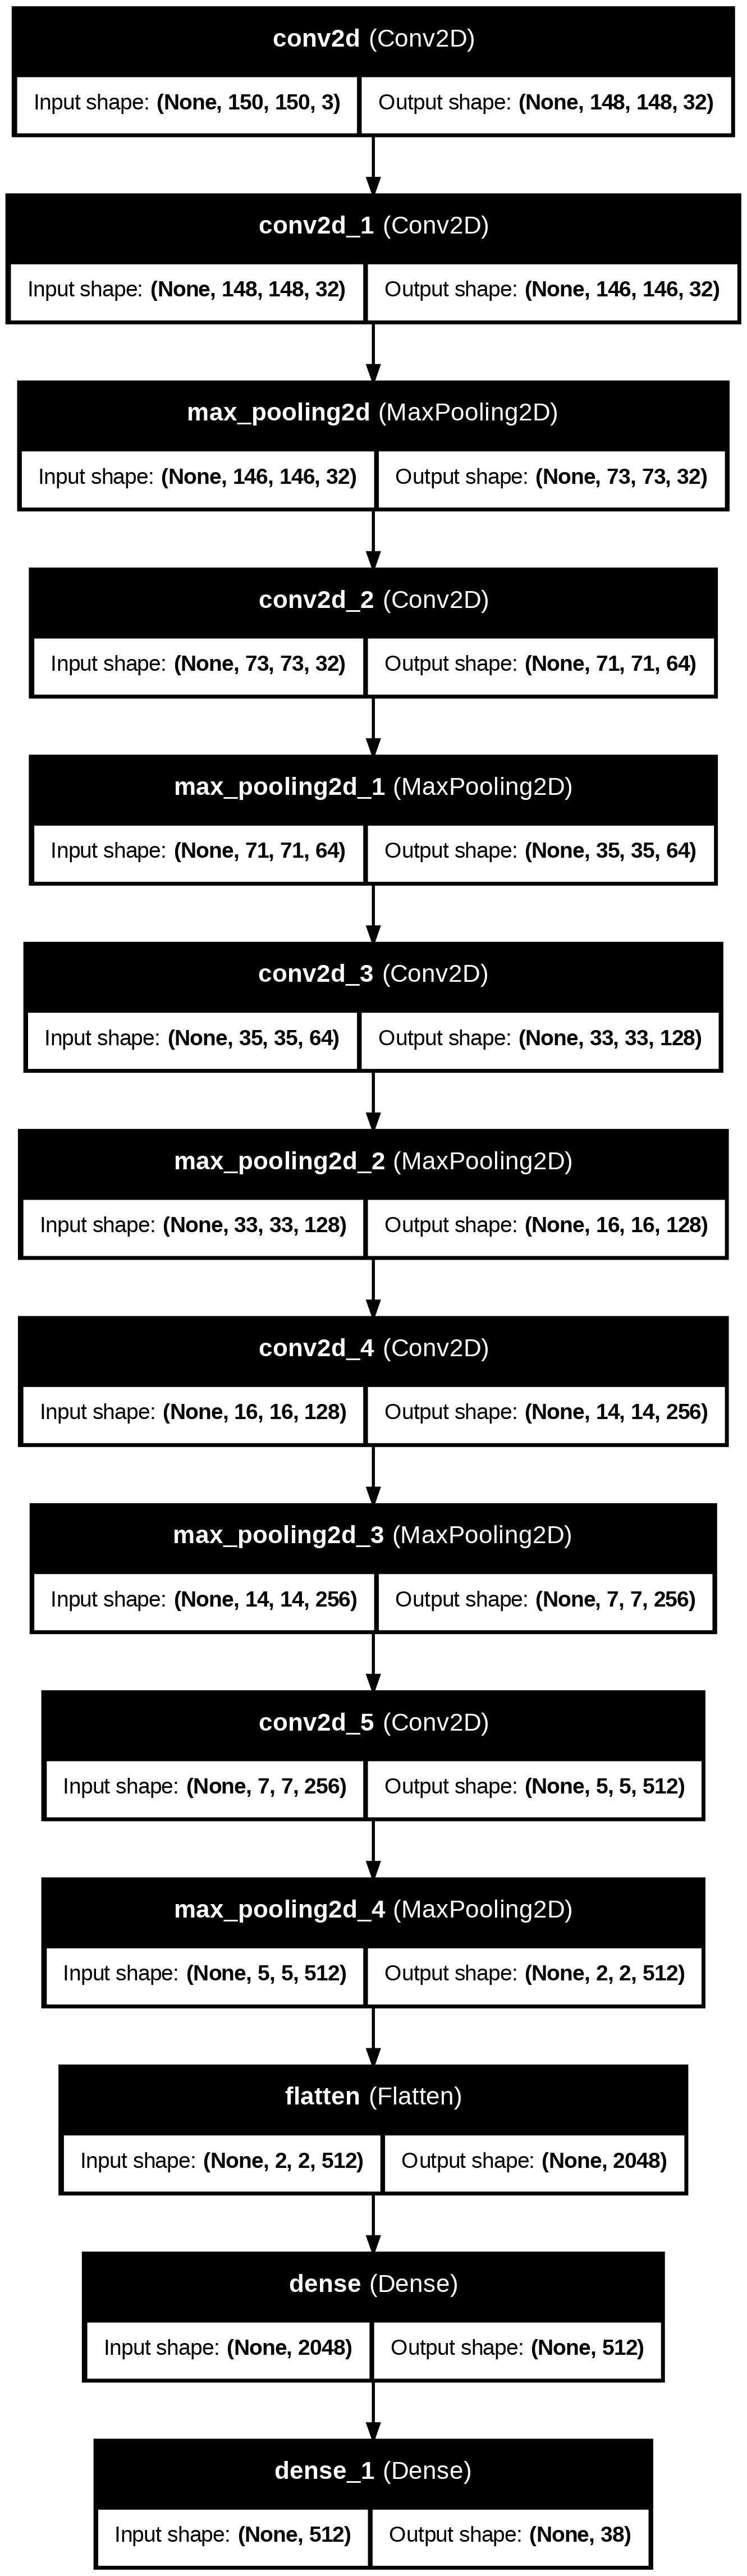

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
from tensorflow.keras import metrics
model.compile(optimizer='adam',loss='categorical_crossentropy'
              ,metrics=['accuracy',metrics.Recall(),metrics.Precision()])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [15]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5)
model_checkpoint=ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [16]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=[early_stopping,model_checkpoint],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2492 - loss: 2.6996 - precision: 0.6454 - recall: 0.1155
Epoch 1: val_loss improved from inf to 1.01926, saving model to best_model.keras
439/439 ━━━━━━━━━━━━━━━━━━━━ 697s 2s/step - accuracy: 0.2496 - loss: 2.6978 - precision: 0.6456 - recall: 0.1159 - val_accuracy: 0.6790 - val_loss: 1.0193 - val_precision: 0.7939 - val_recall: 0.5796
Epoch 2/10
  1/439 ━━━━━━━━━━━━━━━━━━━━ 1:45 241ms/step - accuracy: 0.7188 - loss: 0.8888 - precision: 0.8041 - recall: 0.6094

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 1.01926
439/439 ━━━━━━━━━━━━━━━━━━━━ 87s 199ms/step - accuracy: 0.7188 - loss: 0.8888 - precision: 0.8041 - recall: 0.6094 - val_accuracy: 0.6260 - val_loss: 1.2092 - val_precision: 0.7541 - val_recall: 0.5169
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 844ms/step - accuracy: 0.7552 - loss: 0.7693 - precision: 0.8385 - recall: 0.6807
Epoch 3: val_loss improved from 1.01926 to 0.46603, saving model to best_model.keras
439/439 ━━━━━━━━━━━━━━━━━━━━ 460s 1s/step - accuracy: 0.7553 - loss: 0.7691 - precision: 0.8386 - recall: 0.6808 - val_accuracy: 0.8506 - val_loss: 0.4660 - val_precision: 0.8840 - val_recall: 0.8217
Epoch 4/10
  1/439 ━━━━━━━━━━━━━━━━━━━━ 1:41 232ms/step - accuracy: 0.8594 - loss: 0.4425 - precision: 0.8843 - recall: 0.8359
Epoch 4: val_loss improved from 0.46603 to 0.46312, saving model to best_model.keras
439/439 ━━━━━━━━━━━━━━━━━━━━ 91s 206ms/step - accuracy: 0.8594 - loss: 0.4425 - precision: 0.8843 - recall: 0.8359 - val_accurac

In [18]:
train_accuracy = max(history.history['accuracy'])
val_accuracy = max(history.history['val_accuracy'])

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.9297
Validation Accuracy: 0.9095


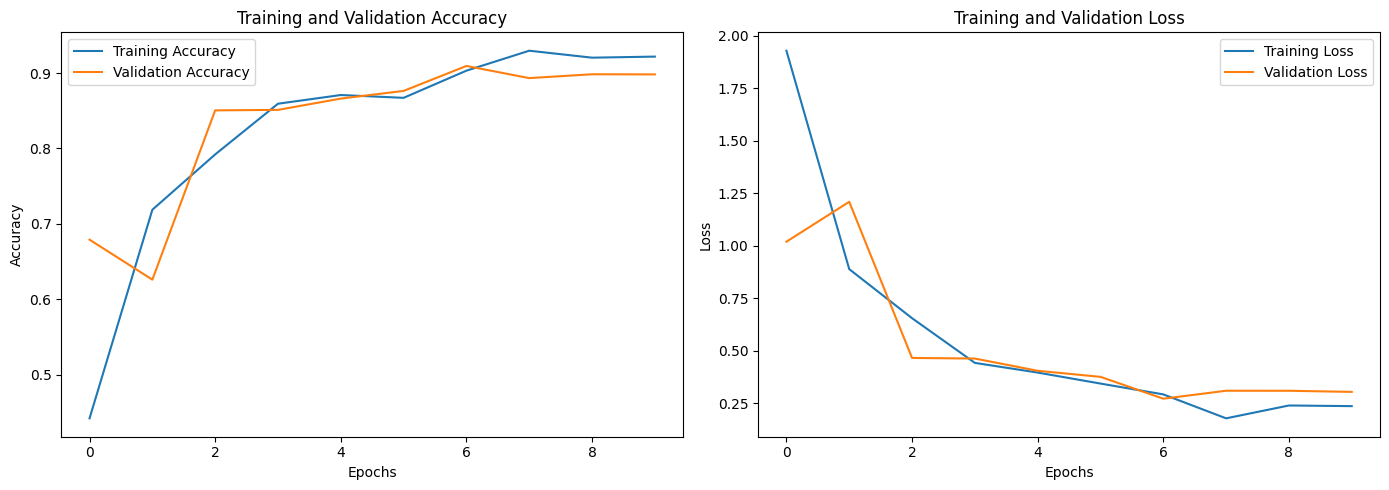

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()